In [1]:
### Şimdi, ilk regresyon modelinizi tasarlama sırası sizde. 
### Bu bölümde, Kaggle'ın "Ev Fiyatları" veri kümesini kullanacaksınız. 
### Bu veri kümesi, Ames/Iowa'da ki konutların birçok yönünü açıklayan 79 değişkenden oluşmaktadır. 
### Göreviniz bu verileri kullanarak, evlerin fiyatlarını tahmin etmek olacak. 
### Verileri ve değişkenlerin açıklamalarını burada bulabilirsiniz: Ev Fiyatları

# Verileri inceleyin ve gerekli tüm verileri temizleyin.
# Verileri araştırın ve konut fiyatlarının tahmininde faydalı olacağını düşündüğünüz bazı değişkenleri bulun.
# Bu özellikleri kullanarak ilk modelinizi oluşturun ve OLS kullanarak parametreleri tahmin edin.

In [27]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [28]:
sale=pd.read_csv('sale_train.csv')
sale.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [29]:
sale=sale[["Street","BldgType","Heating","CentralAir","PoolArea","YrSold","SalePrice"]]

In [30]:
sale.columns=["sokak","bina_tip","isitma","havalandirma","havuz","satis_yili","ucret"]
sale.head(10)
### Ucrete direk etki ettgini dusundugum birkac degisken

,sokak,bina_tip,isitma,havalandirma,havuz,satis_yili,ucret
0,Pave,1Fam,GasA,Y,0,2008,208500
1,Pave,1Fam,GasA,Y,0,2007,181500
2,Pave,1Fam,GasA,Y,0,2008,223500
3,Pave,1Fam,GasA,Y,0,2006,140000
4,Pave,1Fam,GasA,Y,0,2008,250000
5,Pave,1Fam,GasA,Y,0,2009,143000
6,Pave,1Fam,GasA,Y,0,2007,307000
7,Pave,1Fam,GasA,Y,0,2009,200000
8,Pave,1Fam,GasA,Y,0,2008,129900
9,Pave,2fmCon,GasA,Y,0,2008,118000


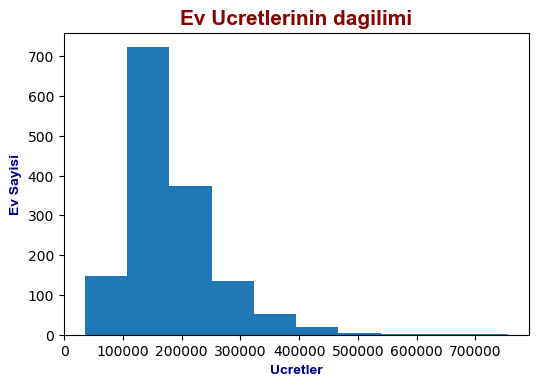

In [32]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(6,4), dpi = 100)

plt.hist(sale.ucret)
plt.title("Ev Ucretlerinin dagilimi", fontdict=baslik_font)
plt.xlabel("Ucretler", fontdict=eksen_font)
plt.ylabel("Ev Sayisi", fontdict=eksen_font)
plt.show()

In [37]:
sale["sokak_dosemeli_mi"] = pd.get_dummies(sale.sokak,drop_first=True)  ##  drop_first=True  ??? 
sale["merkezi_havalandirma_var_mi"] = sale.havalandirma.replace({'Y':1, "N":0})
sale[['sokak_dosemeli_mi','merkezi_havalandirma_var_mi']].head()

,sokak_dosemeli_mi,merkezi_havalandirma_var_mi
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [38]:
sale.head()

,sokak,bina_tip,isitma,havalandirma,havuz,satis_yili,ucret,sokak_dosemeli_mi,merkezi_havalandirma_var_mi
0,Pave,1Fam,GasA,Y,0,2008,208500,1,1
1,Pave,1Fam,GasA,Y,0,2007,181500,1,1
2,Pave,1Fam,GasA,Y,0,2008,223500,1,1
3,Pave,1Fam,GasA,Y,0,2006,140000,1,1
4,Pave,1Fam,GasA,Y,0,2008,250000,1,1


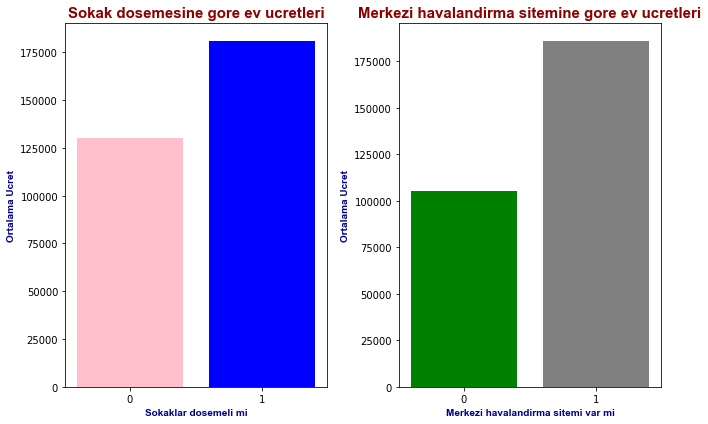

In [41]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.bar(sale.groupby("sokak_dosemeli_mi")["ucret"].mean().index,
        sale.groupby("sokak_dosemeli_mi")["ucret"].mean(),
        color=('pink','blue'))
plt.title("Sokak dosemesine gore ev ucretleri", fontdict=baslik_font)
plt.xlabel("Sokaklar dosemeli mi",fontdict=eksen_font)
plt.ylabel("Ortalama Ucret",fontdict=eksen_font)
plt.xticks([0,1])

plt.subplot(1,2,2)
plt.bar(sale.groupby("merkezi_havalandirma_var_mi")["ucret"].mean().index,
        sale.groupby("merkezi_havalandirma_var_mi")["ucret"].mean(),
        color=('green','grey'))
plt.title("Merkezi havalandirma sitemine gore ev ucretleri", fontdict=baslik_font)
plt.xlabel("Merkezi havalandirma sitemi var mi",fontdict=eksen_font)
plt.ylabel("Ortalama Ucret",fontdict=eksen_font)
plt.xticks([0,1])

plt.tight_layout()
plt.show()

### Sectigimiz degikenlerin ev fiyatlari uzerindeki etkisinini belirgin bir sekilde georebiliyoruz.
### Dosemeli sokaklarin ucrete yansidigini
### Merkezi havalandirma sisteminin ucrete yansidigini 

In [42]:
### Parametre tahmini:
y=sale["ucret"]
x=sale[["sokak_dosemeli_mi","merkezi_havalandirma_var_mi"]]

In [43]:
lrm=linear_model.LinearRegression()
lrm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
print("Degiskenler :\n" , lrm.coef_)
print("Sabit deger (bias) :\n", lrm.intercept_)

Degiskenler :
 [29284.71527228 80391.93189983]
Sabit deger (bias) :
 76595.87873344857


In [45]:
### sokak_dosemeli_mi:  29284.71527228
### merkezi_havalandirma_var_mi : 80391.93189983
### sabit :  76595.87873344857